# Der MNIST-Datensatz und unser MLP

Mit den Testdaten aus `sklearn` haben wir schon gezeigt, dass unser MLP handgeschriebene Ziffern lernen und erkennen kann. Einer der "Klassiker" der KI ist der MNIST-Datensatz, der aus 70.000 handgeschriebenen Ziffern mit einer Auflösung von 28 x 28 = 784 Pixeln besteht, also eine wesentlich höhere Auflösung besitzt und viel mehr Datensätze enthält. Der MNIST-Datensatz gilt zwar lange nicht mehr als Benchmark für Neuronale Netze, wir wollen unser MLP trotzdem einmal damit ausprobieren.

## Die Testdaten

Wir laden den MNIST-Datensatz mit Hilfe von `Scikit-learn` (aus dem Internet oder falls schon gesehen von der Platte) und übernehmen sie in die Variablen __X__ und __y__:

In [25]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X, y = mnist.data, mnist.target

#mnist.data.to_csv("mnist_data.csv",index=False)    
#mnist.target.to_csv("mnist_target.csv",index=False)  


## Eine erste Ansicht der Daten

Die Datensätze liegen als `DataFrames` aus `Pandas` vor und müssen zunächst aufbereitet werden.

In [26]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vorbereitung der Daten

Zunächst extrahieren wir die Rohdaten aus den `DataFrames`. Danach können wir sie wieder mit unserer Hilfsroutine anzeigen:

In [23]:
X_raw, y_raw = X.to_numpy(), y.to_numpy().ravel()

# Visualisierung

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8]


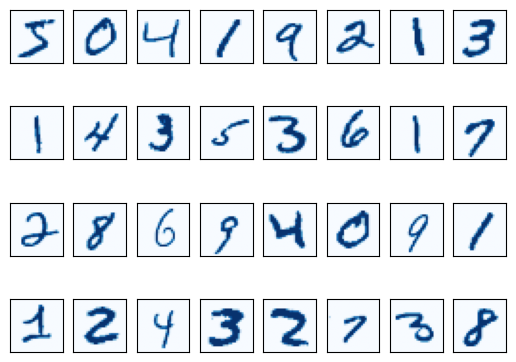

In [27]:
from dl1 import gallery    

rows, cols = 4, 8
print(y_raw[:rows * cols])
images = [x.reshape(28,28) for x in X_raw[:rows * cols]]

gallery(images,rows, cols,cmap='Blues')

## Skalierung und Zerlegung in Trainings- und Testdaten

Die Daten müssen wieder auf Wert zwischen 0 und 1 sortiert werden. Danach zerlegen wir sie in jeweils zwei Anteile für Traing und Tests.

Diesmal verwenden wir Routinen, die verschiedene Pakete von `sklearn` anbieten. 

* Der `MinMaxScaler` skaliert große Datenmengen auf Werte zwischen 0 und 1.
* Die Funktion `train_test_split` teilt unseren Datensatz in verschieden große Bereiche auf. Dabei werden die Datenzusätzlich bunt gemischt, was bei der Entwicklung oft hilfreich ist. Mit Hilfe des Parameters `random_state` lässt sich diese Zufalligkeit "steuern" (d.h. reproduzieren).



In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_raw = MinMaxScaler().fit_transform(X_raw)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = 42)

## Das MLP

Wir laden das MLP diesmal aus unserer Bibliothek `dl1`. 

Ein- und Ausgabeschicht sind durch das Problem definiert:

* 28 x 28 = 784 Neuronen in der __Eingabeschicht__
* 10 Neuronen in der __Ausgabeschicht__, eines für jede Ziffer von 0 bis 9

Bei der verborgenen Schicht sind wir frei, und hier beginnt die Arbeit des Data Scientists. Es gibt viele Möglichkeiten zum Experimentieren. Wir setzen die Anzahl der Neuronen auf 128; Zweier-Potenzen sind vielleicht nicht schlecht.

* 128 Neuronen in der __verborgenen Schicht__

Noch hat es nichts gelernt; die Trefferquote liegt bei etwa 10 %.

In [29]:
from dl1 import MLP

mlp = MLP(28 * 28, 128, 10) 

score, _ = mlp.score(X_test,y_test)
print(f'Trefferquote: {score:.2%}')


Trefferquote: 10.03%


##  Training des MLP

Mit der Definition des Netzwerks und einer geeigneten Skalierungsfunktion für die Anpassung der Daten ist unsere Arbeit getan. Jetzt lassen wir das neuronale Netzwerk arbeiten, bzw. trainieren und messen seine Zuverlässigkeit:

In [30]:
mlp.fit(X_train, y_train, epochs = 1)

Durchlauf #1 von 1 beendet


In [18]:
score, falsch = mlp.score(X_test, y_test)
print(f'Trefferquote: {score:.2%}')

Trefferquote: 95.12%


Nach wenigen Sekunden ist der Durchlauf beendet, und das MLP hat einer Trefferquote von etwa 95 %.

Wir haben nun im Array die falsche klassifizierten Ziffern. Sehen wir uns ein paar davon an:

[9 3 0 7 3 9 8 8 0 7 1 3 2 1 3 5 4 2 8 2 8 9 3 8 5 4 9 5 2 9 7 3]


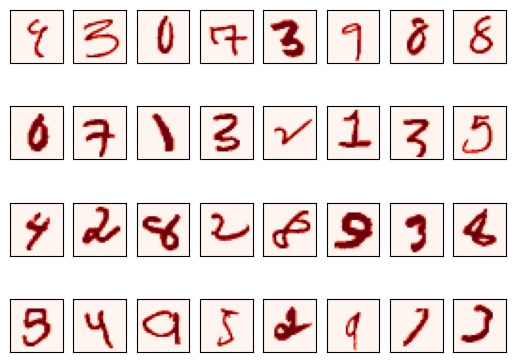

In [31]:
x_falsch, y_falsch = X_test[falsch], y_test[falsch]

rows, cols = 4, 8
print(y_falsch[:rows * cols])
images = [x.reshape(28,28) for x in x_falsch[:rows * cols]]

gallery(images,rows, cols,cmap='Reds')

### Speichern der Daten

Nachdem das MLP trainiert wurde, liegt das ganze Wissen in den Gewichten. Wir speichern diese zur späteren Verwendung (wir haben unsere Klasse entsprechend erweitert):

In [32]:
mlp.save("mnist")

Gewichte wurden gespeichert
